# RNN, Time Series Modeling

Recurrent Neural Network, which is usually used to predict sequential data.

Reference: https://excelsior-cjh.tistory.com/184

## 1. Generating a time-series Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
t_min, t_max = 0, 30
resolution = 0.1     #the smallest interval measurable by a scientific (especially optical) instrument

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

In [3]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution ))

In [4]:
n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

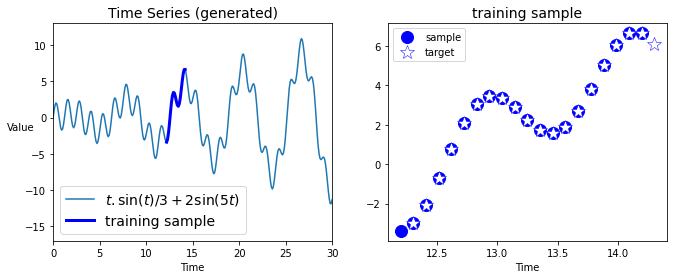

In [5]:
plt.figure(figsize = (11, 4))
plt.subplot(121)   #1 row, 2 cols, 1st subplot
plt.title('Time Series (generated)', fontsize = 14)
plt.plot(t, time_series(t), label = r"$t.\sin(t)/3 + 2\sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label = 'training sample')
plt.legend(loc = 'lower left', fontsize = 14)
plt.axis([0, 30, -17, 13])
plt.xlabel('Time')
plt.ylabel('Value', rotation = 0)

plt.subplot(122)  #1 row, 2 cols, 2nd subplot
plt.title('training sample', fontsize = 14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), 'bo', markersize = 12, label = 'sample')
plt.plot(t_instance[1:], time_series(t_instance[1:]), 'w*', 
         markeredgewidth = 0.5, markeredgecolor='b', markersize = 14, label = 'target')
plt.legend(loc = 'upper left')
plt.xlabel('Time')

plt.show()

## 2. Simple RNN modeling (Vanilla RNN)
### (1) Model 1

In [6]:
input_data = time_series(t_instance[:-1]).reshape(-1,1,1)
target_data = time_series(t_instance[1:]).reshape(-1,1,1)

In [7]:
model1 = models.Sequential()

model1.add(layers.SimpleRNN(1, activation = 'relu', return_sequences = False, input_shape = [1, 1]))

return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence. Default: False

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
model1.compile(optimizer='adam', loss='mse')

history1 = model1.fit(input_data, target_data, epochs = 1000, verbose = 0)

In [10]:
prediction1 = model1.predict(input_data)
print(prediction1.shape)
print(prediction1)

(20, 1)
[[0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [1.1744518]
 [2.455309 ]
 [3.3690567]
 [3.7791786]
 [3.683453 ]
 [3.2133021]
 [2.5971498]
 [2.0976794]
 [1.9399018]
 [2.2494242]
 [3.0175595]
 [4.1026907]
 [5.26753  ]
 [6.2422533]
 [6.796516 ]
 [6.8009496]]


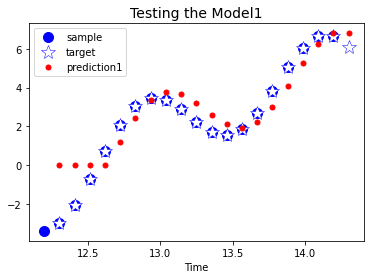

In [11]:
plt.title("Testing the Model1", fontsize=14)

plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="sample")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", 
         markeredgewidth = 0.5, markeredgecolor='b', markersize = 14, label="target")
plt.plot(t_instance[1:], prediction1, "r.", markersize=10, label="prediction1")
plt.legend(loc="upper left")    #loc: location
plt.xlabel("Time")

plt.show()

1. Too simple to predict. Only 3 parameters to train.
2. How can we count the number of parameters?

### (2) Model 2

In [12]:
model2 = models.Sequential()

model2.add(layers.SimpleRNN(100, activation = 'relu', return_sequences = False, input_shape = [1, 1]))
model2.add(layers.Dense(1))

In [13]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [14]:
model2.compile(optimizer='adam', loss='mse')

history2 = model2.fit(input_data, target_data, epochs = 1000, verbose = 0)

In [15]:
prediction2 = model2.predict(input_data)
print(prediction2.shape)
print(prediction2)

(20, 1)
[[-2.8583202 ]
 [-2.2153132 ]
 [-0.70268923]
 [ 0.9343803 ]
 [ 1.5616454 ]
 [ 2.495372  ]
 [ 3.355553  ]
 [ 3.7609782 ]
 [ 3.6663487 ]
 [ 3.201582  ]
 [ 2.6229517 ]
 [ 2.1731546 ]
 [ 2.0684507 ]
 [ 2.3098676 ]
 [ 3.017463  ]
 [ 4.0807853 ]
 [ 5.232286  ]
 [ 6.1958466 ]
 [ 6.743762  ]
 [ 6.7481456 ]]


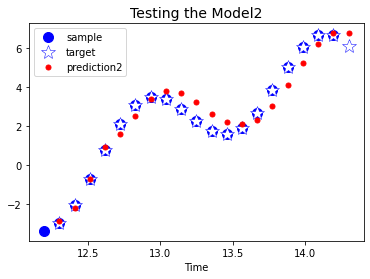

In [16]:
plt.title("Testing the Model2", fontsize=14)

plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="sample")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", 
         markeredgewidth = 0.5, markeredgecolor='b', markersize = 14, label="target")
plt.plot(t_instance[1:], prediction2, "r.", markersize=10, label="prediction2")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

### (3) Model 3

In [17]:
model3 = models.Sequential()

model3.add(layers.SimpleRNN(100, activation = 'relu', return_sequences = False, input_shape = [1, 1]))
model3.add(layers.Dense(32, activation = 'relu'))
model3.add(layers.Dropout(0.4))
model3.add(layers.Dense(1, activation = 'relu'))

In [18]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                3232      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 13,465
Trainable params: 13,465
Non-trainable params: 0
_________________________________________________________________


In [19]:
model3.compile(optimizer = 'adam', loss = 'mse')

history3 = model3.fit(input_data, target_data, epochs = 1000, verbose = 0)

In [20]:
prediction3 = model3.predict(input_data)

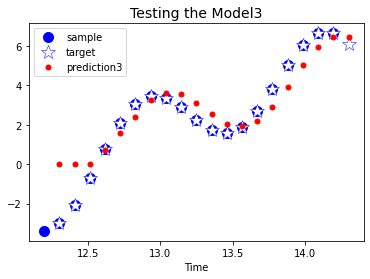

In [21]:
plt.title("Testing the Model3", fontsize=14)

plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="sample")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", 
         markeredgewidth = 0.5, markeredgecolor='b', markersize = 14, label="target")
plt.plot(t_instance[1:], prediction3, "r.", markersize=10, label="prediction3")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

초반에는 왜 제대로 나타나지 않을까?

### (4) Model 4

Changing the number of samples.

In [22]:
n_steps2 = 30
t_instance2 = np.linspace(12.2, 12.2 + resolution * (n_steps2 + 1), n_steps2 + 1)

In [23]:
input_data2 = time_series(t_instance2[:-1]).reshape(-1,1,1)
target_data2 = time_series(t_instance2[1:]).reshape(-1,1,1)

In [24]:
model4 = models.Sequential()

model4.add(layers.SimpleRNN(100, activation = 'relu', return_sequences = False, input_shape = [1, 1]))
model4.add(layers.Dense(32, activation = 'relu'))
model4.add(layers.Dropout(0.4))
model4.add(layers.Dense(1, activation = 'relu'))

In [25]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                3232      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 13,465
Trainable params: 13,465
Non-trainable params: 0
_________________________________________________________________


In [26]:
model4.compile(optimizer='adam', loss='mse')

history4 = model4.fit(input_data2, target_data2, epochs = 1000, verbose = 0)

In [27]:
prediction4 = model4.predict(input_data2)

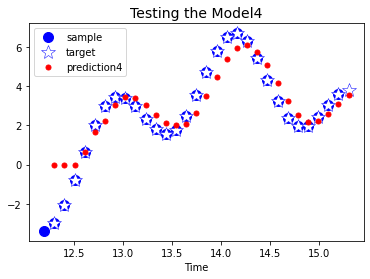

In [28]:
plt.title("Testing the Model4", fontsize=14)

plt.plot(t_instance2[:-1], time_series(t_instance2[:-1]), "bo", markersize=10, label="sample")
plt.plot(t_instance2[1:], time_series(t_instance2[1:]), "w*", 
         markeredgewidth = 0.5, markeredgecolor='b', markersize = 14, label="target")
plt.plot(t_instance2[1:], prediction4, "r.", markersize=10, label="prediction4")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()